# Предобработка

Загрузка библиотек

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn import preprocessing

Чтение файлов из шаблона

In [12]:
dat1 = pd.read_excel('C:/Users/KiBor/projects/VKR/X_bp_vkrdataset.xlsx')
dat1.drop(['Unnamed: 0'], axis=1, inplace=True)
dat2 = pd.read_excel('C:/Users/KiBor/projects/VKR/X_nup_vkrdataset.xlsx')
dat2.drop(['Unnamed: 0'], axis=1, inplace=True)

Объединение по индексу тип объединения INNER

In [13]:
data = dat1.merge(dat2, left_index = True, right_index = True, how = 'inner')
data

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Проверка датасета на пустые значения

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Название столбцов

In [15]:
#colnames = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
#         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
#         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
#        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
colnames = data.columns

## Разведочный анализ

Соотношение матрица-наполнитель


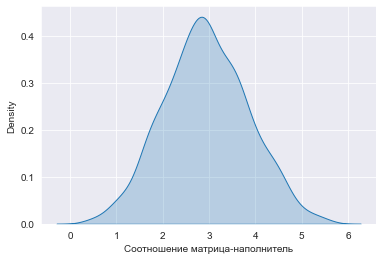

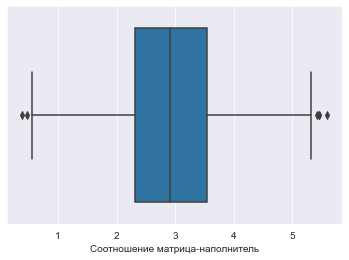

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3


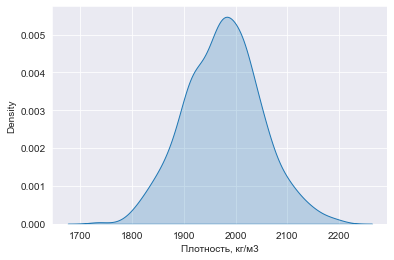

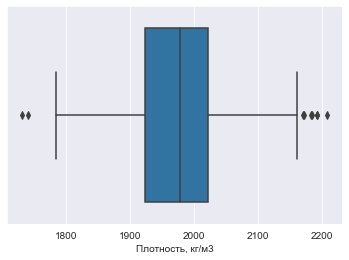

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа


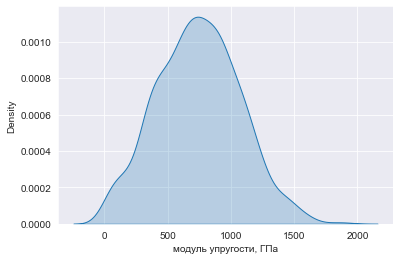

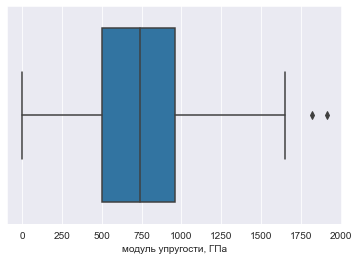

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327697792



Количество отвердителя, м.%


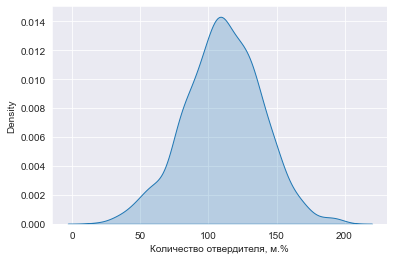

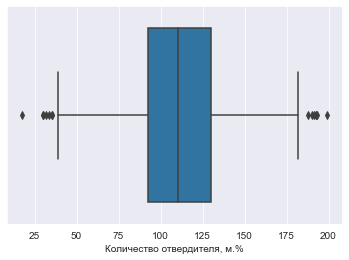

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736258
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


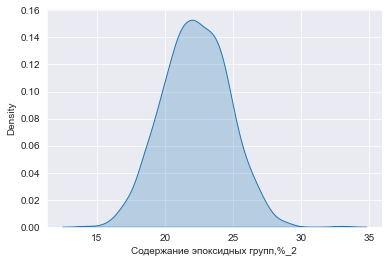

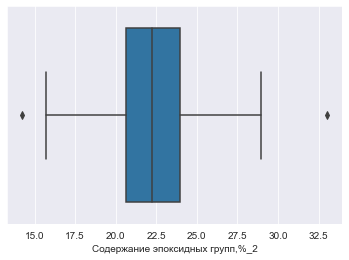

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776772
Медианное значение:  22.2307437560244



Температура вспышки, С_2


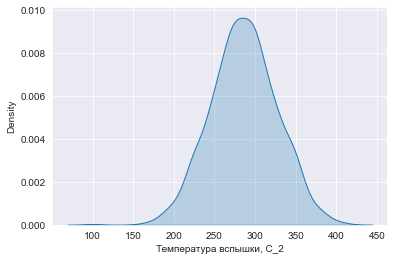

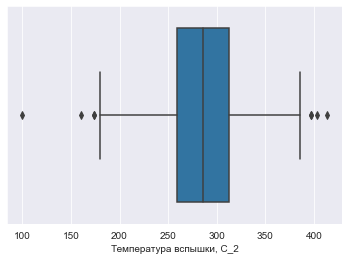

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162227
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


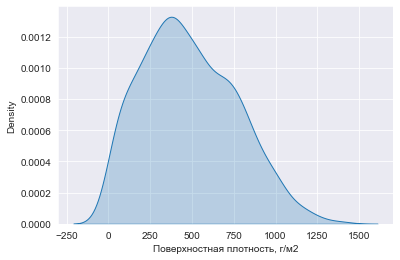

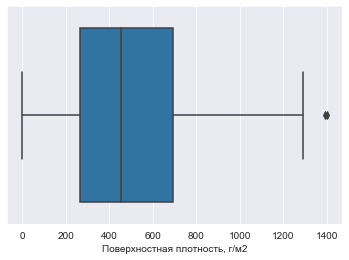

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.7318330384181
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


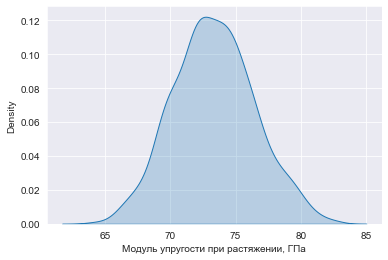

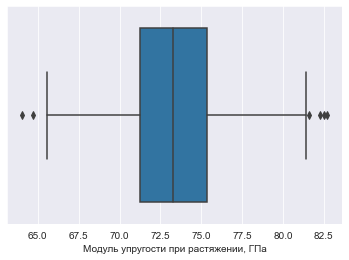

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009073
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


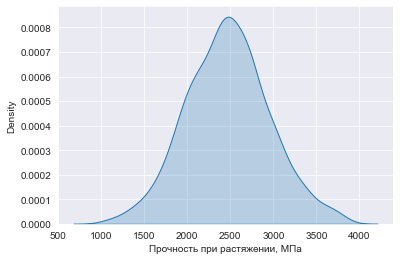

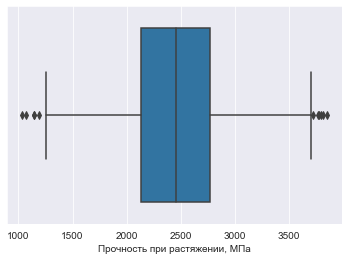

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.9228426979025
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


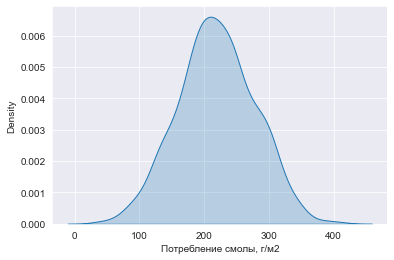

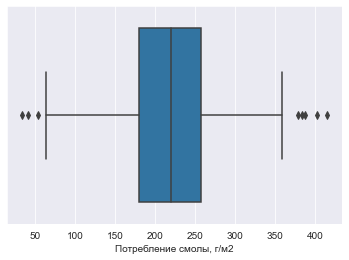

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654265
Медианное значение:  219.198882195134



Угол нашивки, град


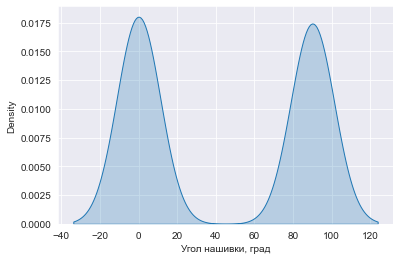

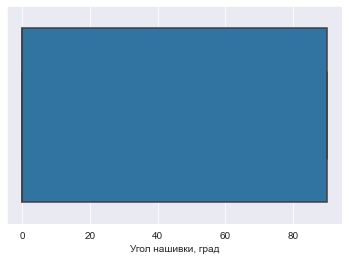

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  44.252199413489734
Медианное значение:  0.0



Шаг нашивки


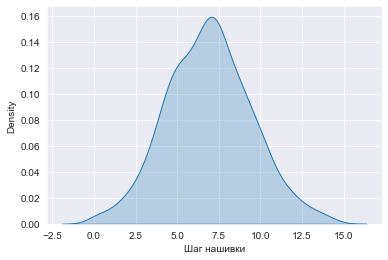

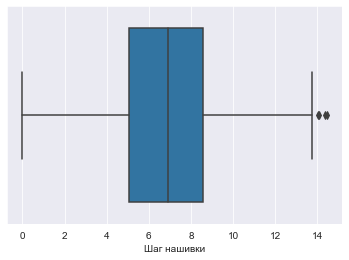

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки


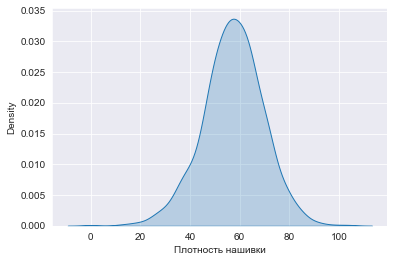

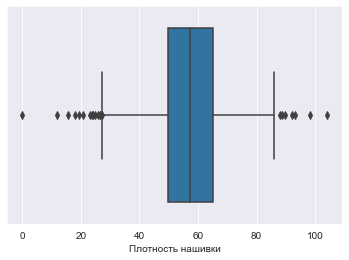

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929





In [16]:
for colname in colnames:
    print(colname)
    
    #Гистограмма распределения
    sub_data = data[colname]
    sns.set_style("darkgrid")
    sns.kdeplot(data=sub_data, shade=True, palette='colorblind')
    plt.show()
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data);
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data))
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data))
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data))

    print("Медианное значение: ", end=" ")
    print(np.median(sub_data))
    print("\n\n")

Столбцы с выбросами

In [17]:
colnames_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

Замена выбросов на пустые значения

In [18]:
for x in colnames_drop:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    data.loc[data[x] < min, x] = np.nan
    data.loc[data[x] > max, x] = np.nan
data.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Удаляем пустые значения

In [19]:
data_pure = data.dropna(axis=0)
data_pure.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Повторный разведочный анализ (без выбросов)

Соотношение матрица-наполнитель


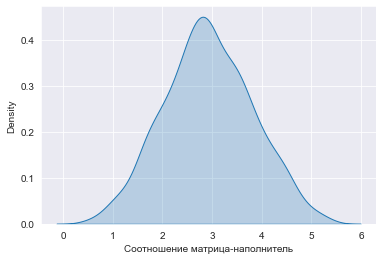

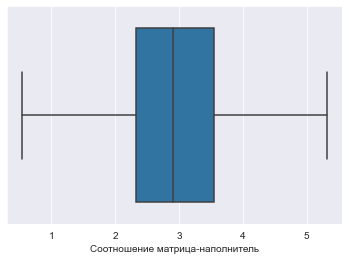

Минимальное значение:  0.547391007365624
Максимальное значение:  5.3141436851035
Среднее значение:  2.925683381793367
Медианное значение:  2.904730696156465



Плотность, кг/м3


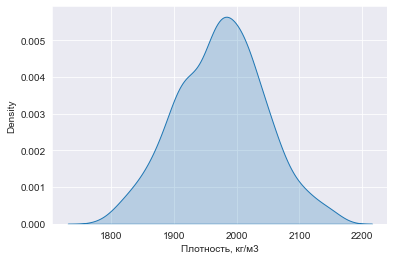

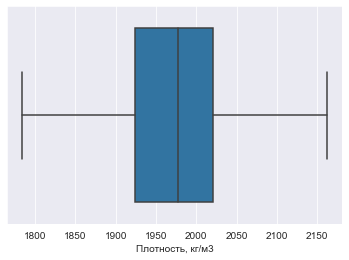

Минимальное значение:  1784.48224524858
Максимальное значение:  2161.56521646388
Среднее значение:  1974.0400234046288
Медианное значение:  1977.2580428731148



модуль упругости, ГПа


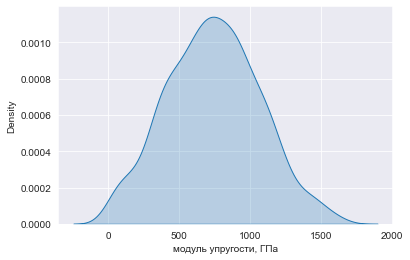

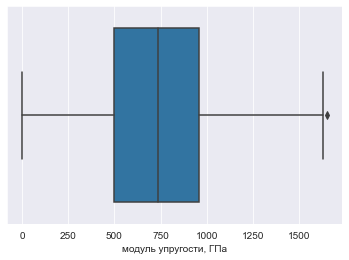

Минимальное значение:  2.4369087535075
Максимальное значение:  1649.41570587587
Среднее значение:  738.247626760584
Медианное значение:  738.736842105263



Количество отвердителя, м.%


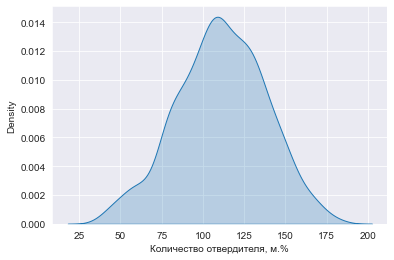

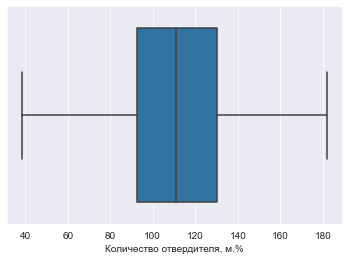

Минимальное значение:  38.6685003343557
Максимальное значение:  181.82844779488
Среднее значение:  110.91621571054407
Медианное значение:  111.11317502464999



Содержание эпоксидных групп,%_2


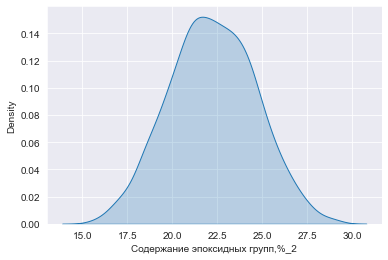

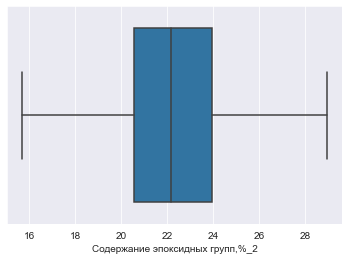

Минимальное значение:  15.6958938036288
Максимальное значение:  28.9550943746499
Среднее значение:  22.20903047048597
Медианное значение:  22.184712531998002



Температура вспышки, С_2


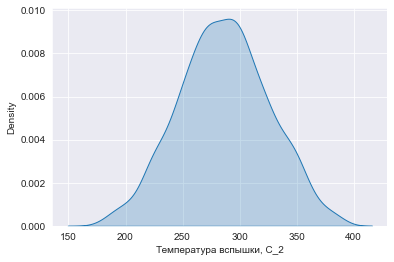

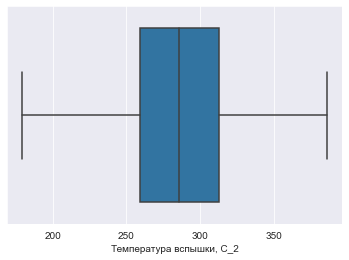

Минимальное значение:  179.37439137039
Максимальное значение:  386.067991779505
Среднее значение:  286.04041424804393
Медианное значение:  286.024117532195



Поверхностная плотность, г/м2


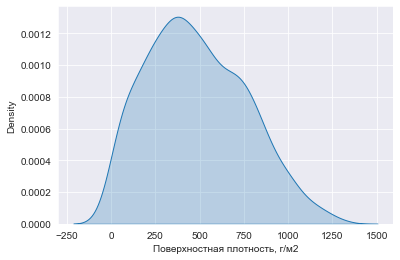

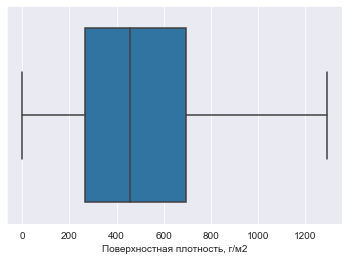

Минимальное значение:  0.603739925153945
Максимальное значение:  1291.34011463545
Среднее значение:  482.9939014162405
Медианное значение:  457.7322458016435



Модуль упругости при растяжении, ГПа


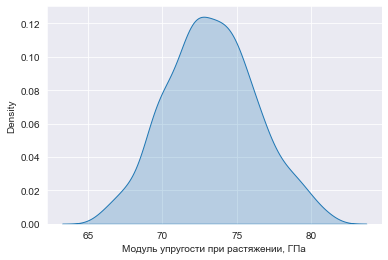

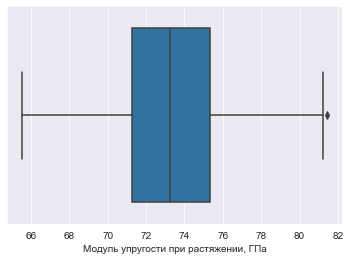

Минимальное значение:  65.5533359100584
Максимальное значение:  81.4171259444738
Среднее значение:  73.30512659759603
Медианное значение:  73.25922960132405



Прочность при растяжении, МПа


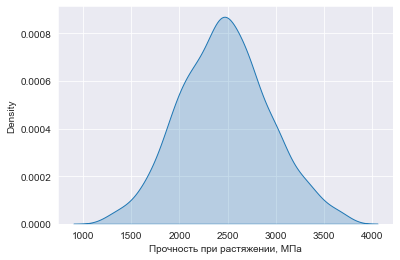

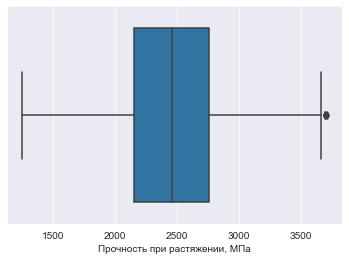

Минимальное значение:  1250.39280220501
Максимальное значение:  3705.67252336168
Среднее значение:  2467.488822012067
Медианное значение:  2457.9597673317303



Потребление смолы, г/м2


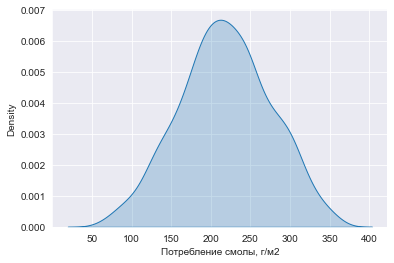

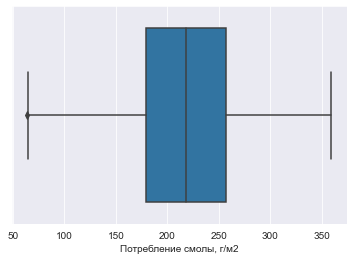

Минимальное значение:  63.6856983307984
Максимальное значение:  359.052219789673
Среднее значение:  217.61337420042463
Медианное значение:  218.388714705812



Угол нашивки, град


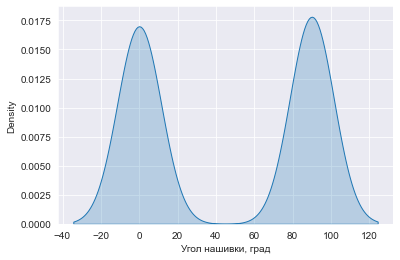

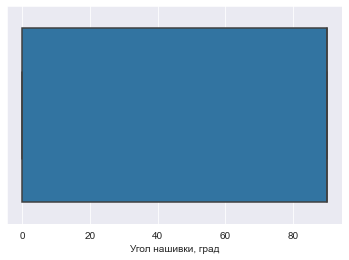

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  46.05769230769231
Медианное значение:  90.0



Шаг нашивки


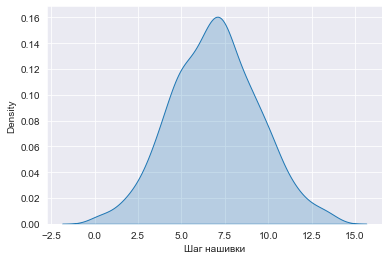

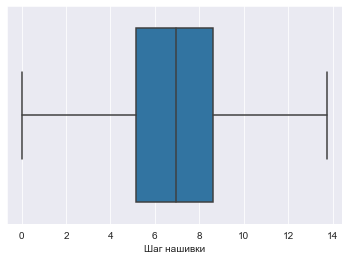

Минимальное значение:  0.0376389366987437
Максимальное значение:  13.732404403383
Среднее значение:  6.91558459970514
Медианное значение:  6.943336869815219



Плотность нашивки


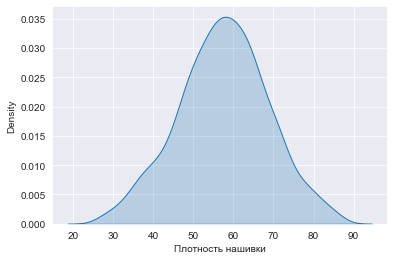

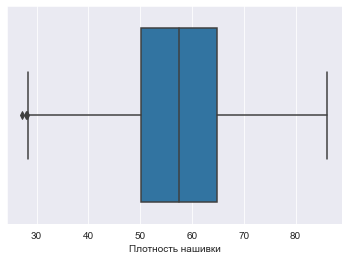

Минимальное значение:  27.2729280063294
Максимальное значение:  86.0124270098611
Среднее значение:  57.451895023129765
Медианное значение:  57.584224985771854





In [20]:
for colname in colnames:
    print(colname)
    
    #Гистограмма распределения
    sub_data2 = data_pure[colname]
    sns.set_style("darkgrid")
    sns.kdeplot(data=sub_data2, shade=True, palette='colorblind')
    plt.show()
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data2);
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data2))
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data2))
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data2))

    print("Медианное значение: ", end=" ")
    print(np.median(sub_data2))
    print("\n\n")

Строим диаграммы рассеивания

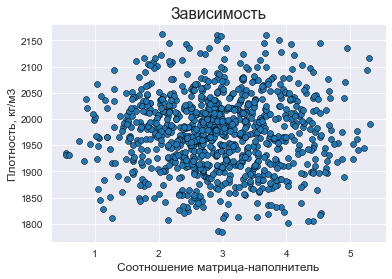

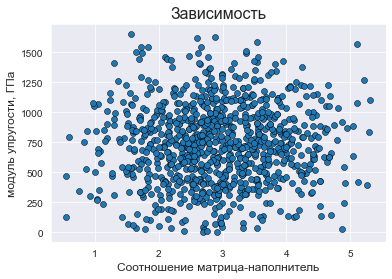

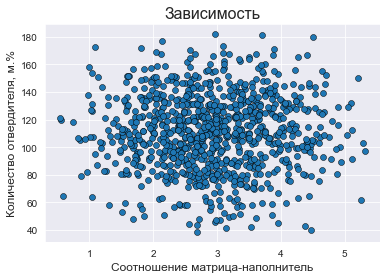

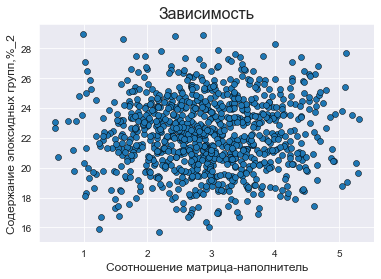

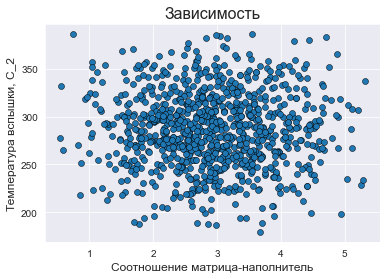

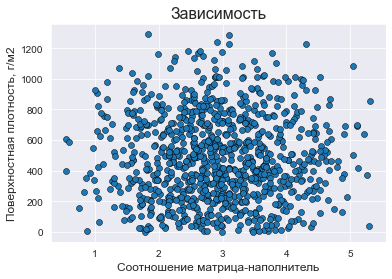

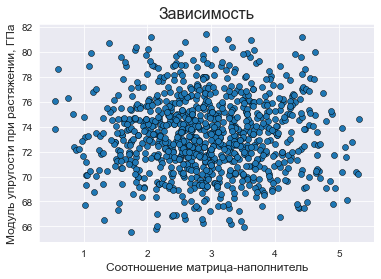

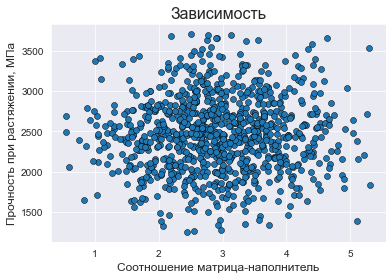

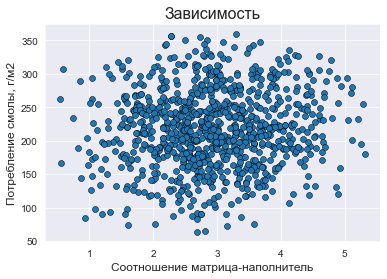

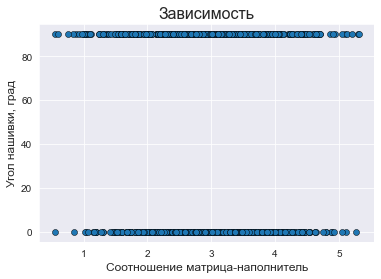

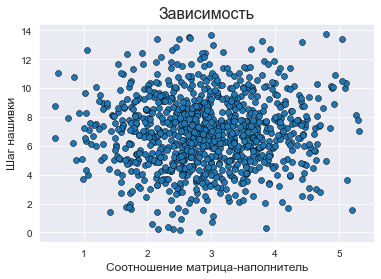

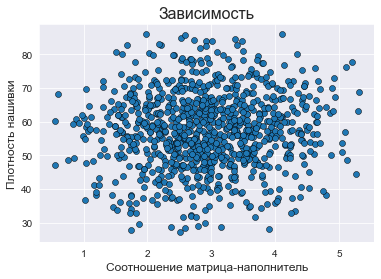

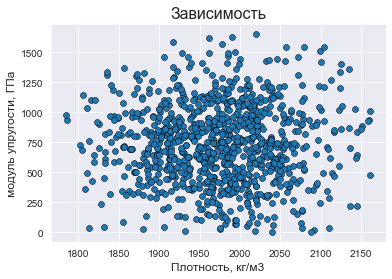

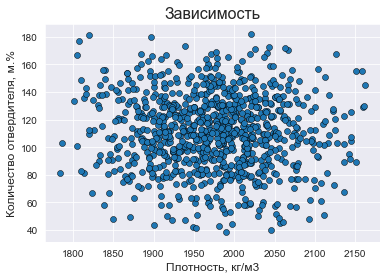

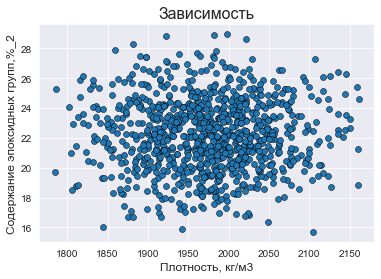

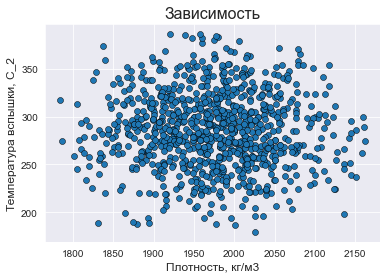

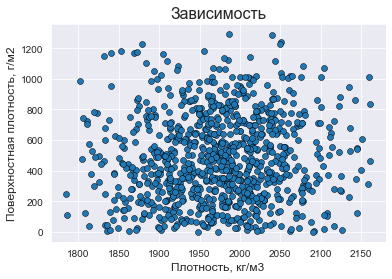

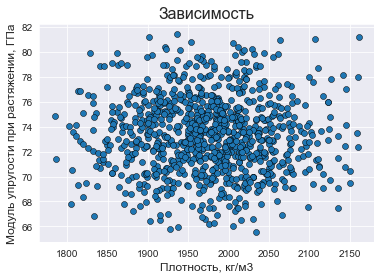

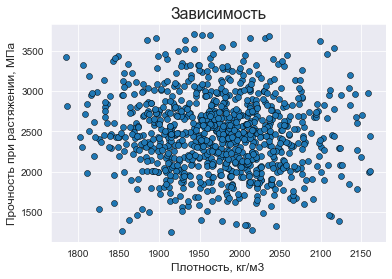

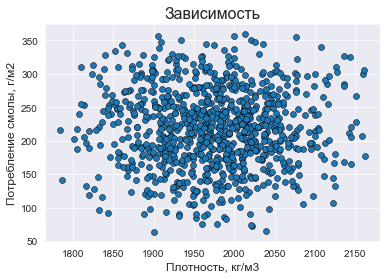

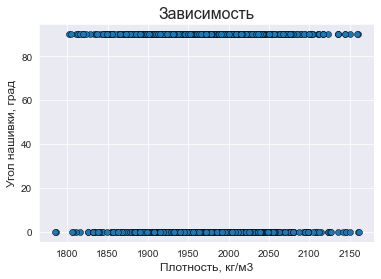

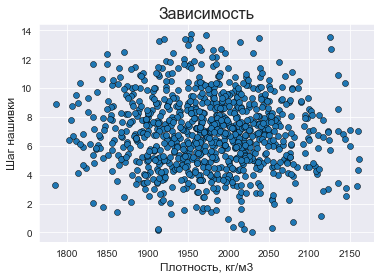

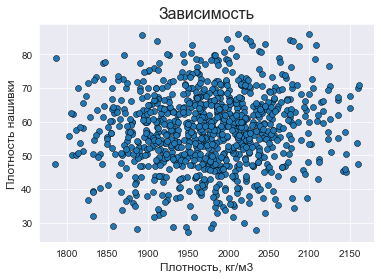

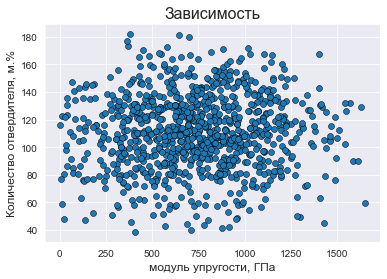

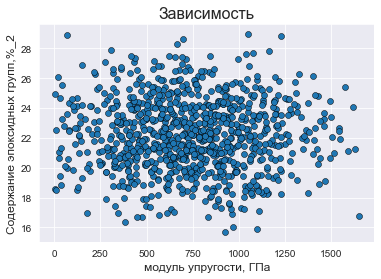

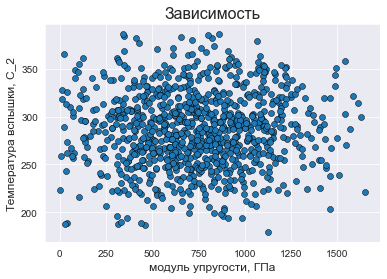

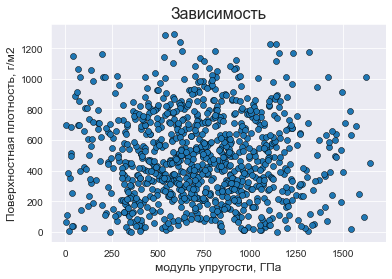

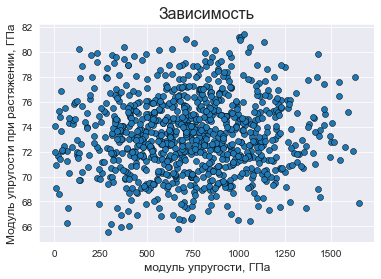

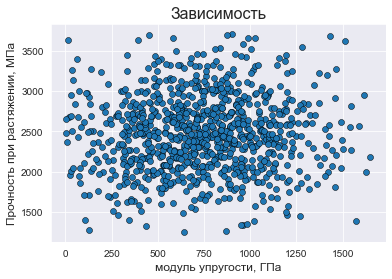

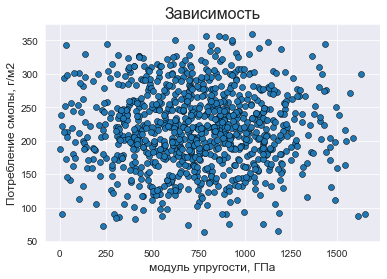

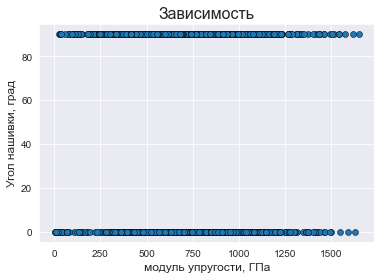

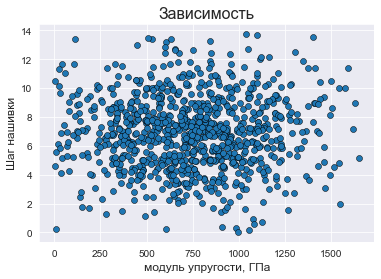

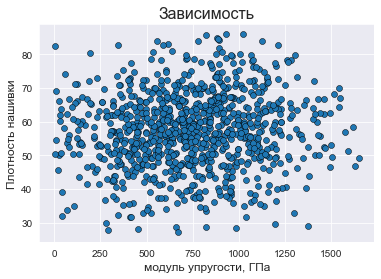

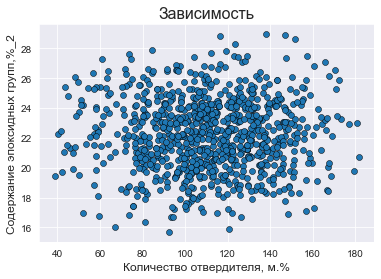

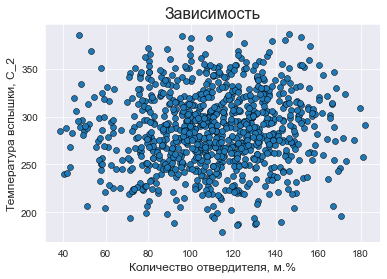

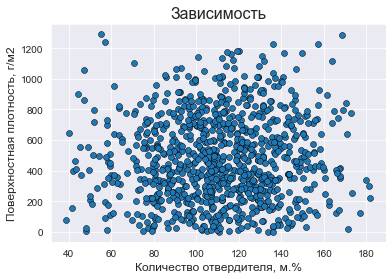

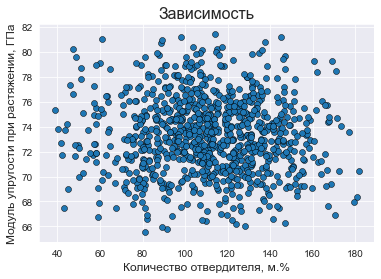

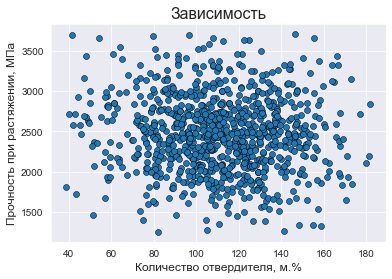

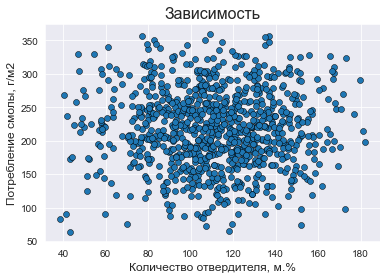

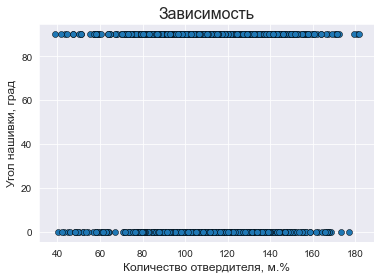

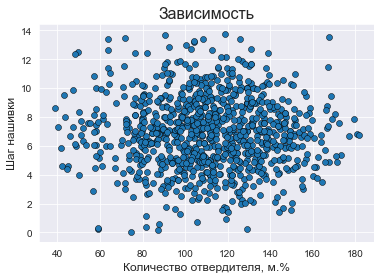

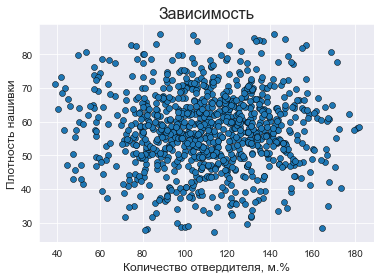

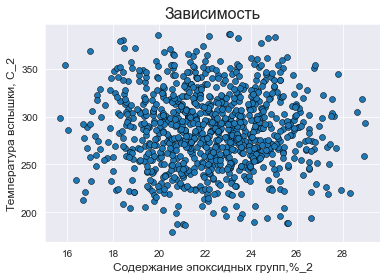

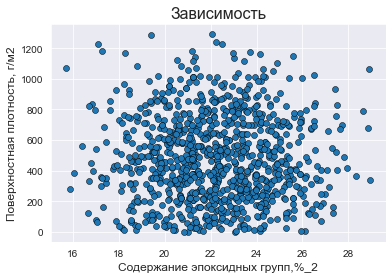

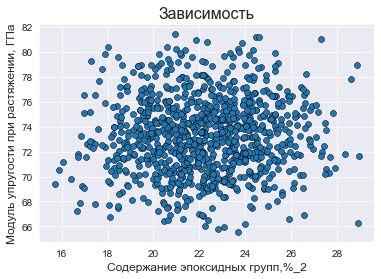

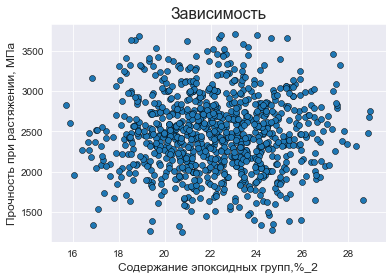

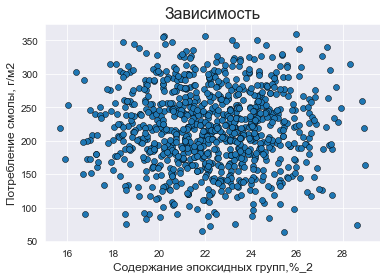

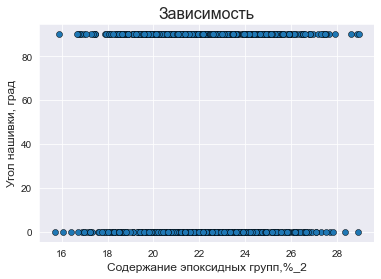

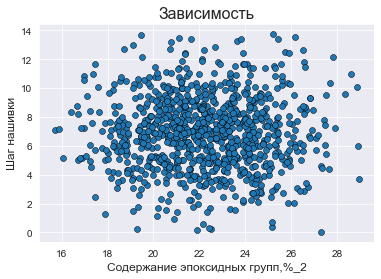

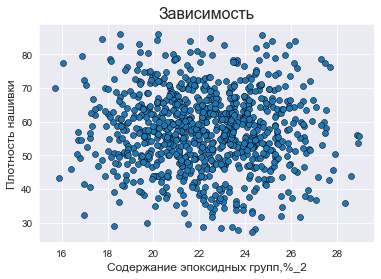

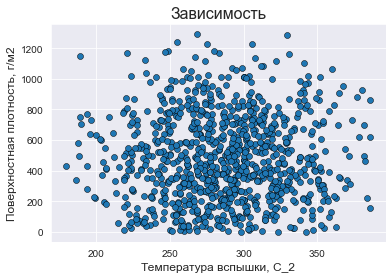

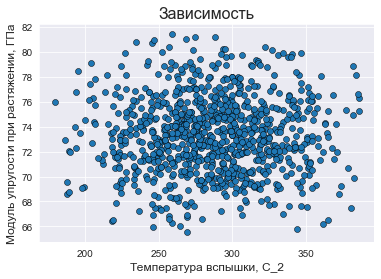

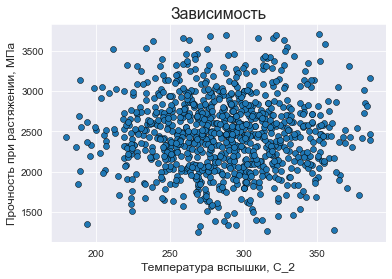

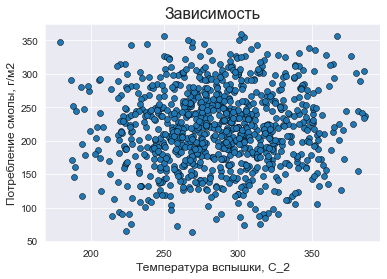

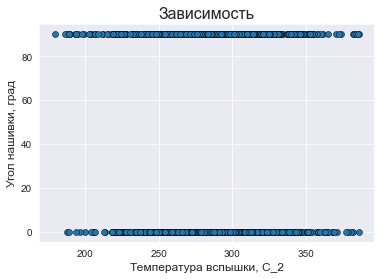

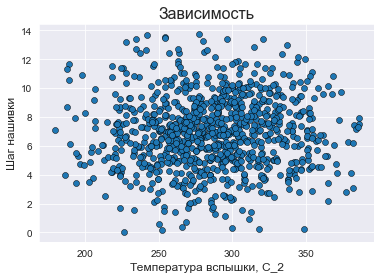

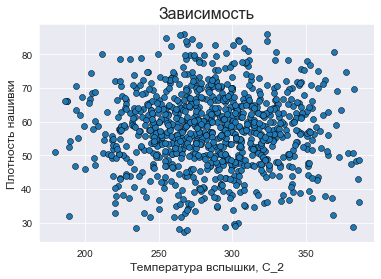

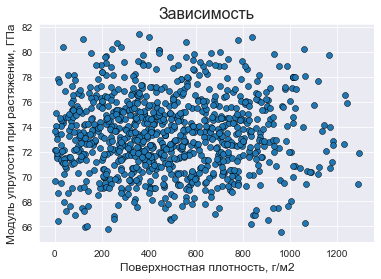

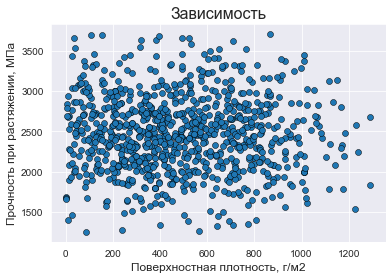

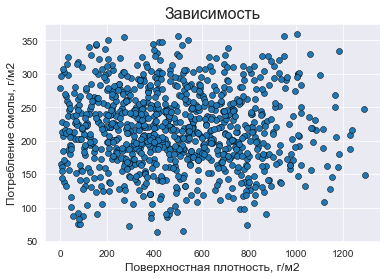

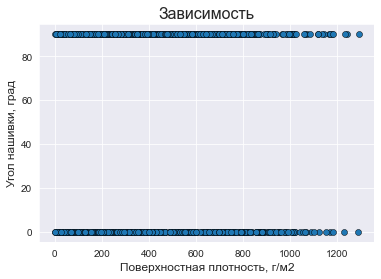

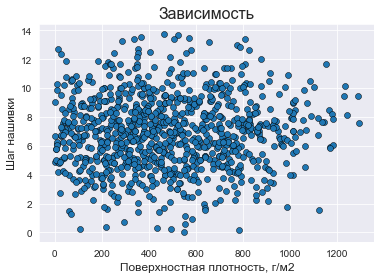

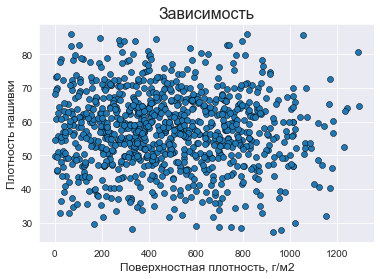

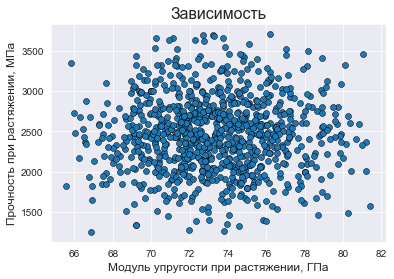

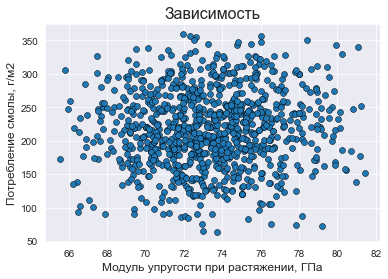

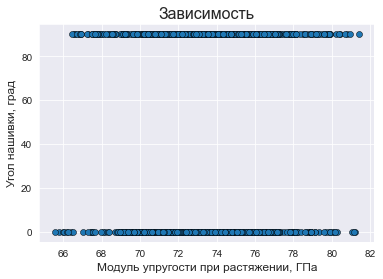

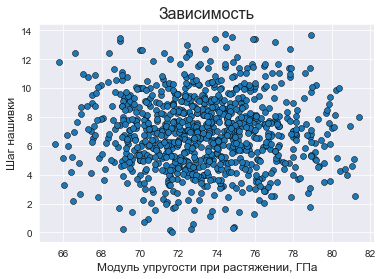

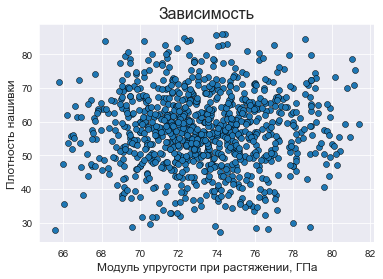

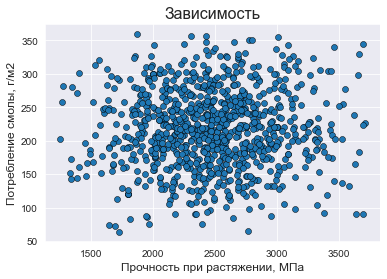

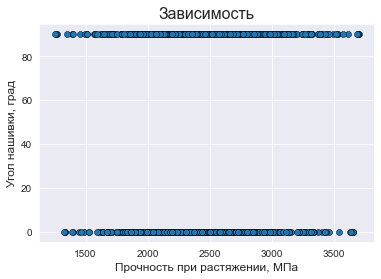

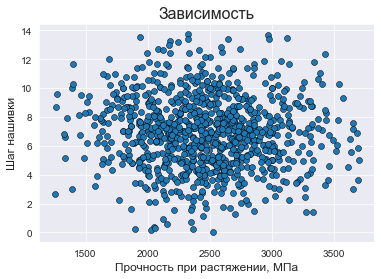

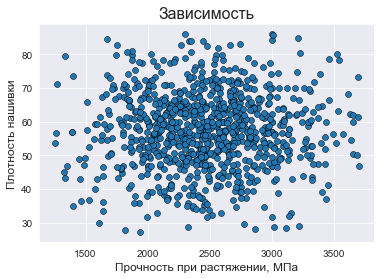

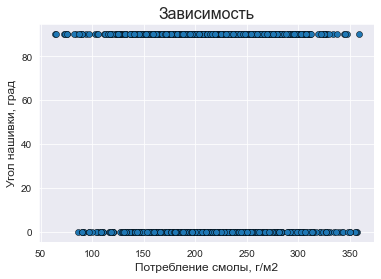

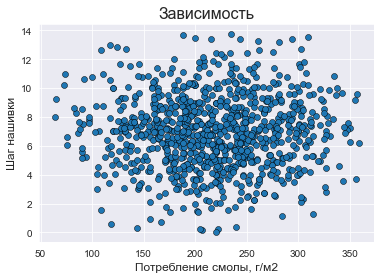

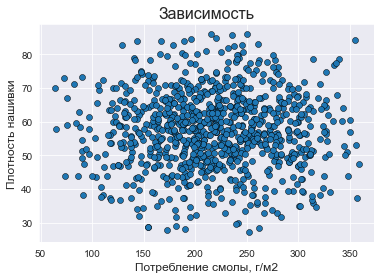

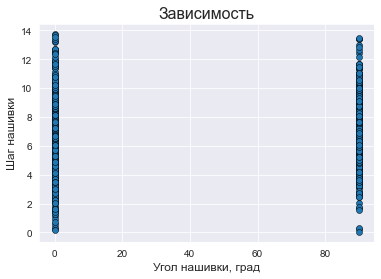

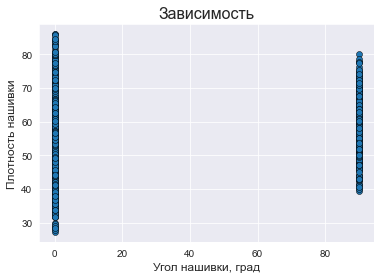

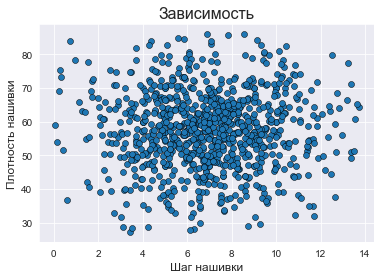

In [21]:
nmbr = 0
while nmbr < len(colnames):
    nmbr2 = nmbr+1
    while nmbr2 < len(colnames):
        sns.set_style('darkgrid')
        plt.title('Зависимость',size=16)
        plt.xlabel(colnames[nmbr],size=12)
        plt.ylabel(colnames[nmbr2],size=12)
        sns.scatterplot(x=colnames[nmbr], y=colnames[nmbr2], data=data_pure, edgecolor='black', palette='cubehelix')
        plt.show()
        nmbr2 += 1
    nmbr += 1

In [22]:
data_pure[colnames].corr() #График корелляции

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.001676   
модуль упругости, ГПа                                        0.043888   
Количество отвердителя, м.%                                  0.007812   
Содержание эпоксидных групп,%_2                              0.027587   
Температура вспышки, С_2                                    -0.006275   
Поверхностная плотность, г/м2                                0.007540   
Модуль упругости при растяжении, ГПа                        -0.019248   
Прочность при растяжении, МПа                                0.024488   
Потребление смолы, г/м2                                      0.075740   
Угол нашивки, град                                          -0.035897   
Шаг нашивки                                                  0.039109   
Плотность нашивки                                            0.052466   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.001676               0.043888   
Плотность, кг/м3                              1.000000               0.004326   
модуль упругости, ГПа                         0.004326               1.000000   
Количество отвердителя, м.%                  -0.050210               0.036523   
Содержание эпоксидных групп,%_2              -0.001065              -0.013271   
Температура вспышки, С_2                     -0.023507               0.029318   
Поверхностная плотность, г/м2                 0.062705              -0.008987   
Модуль упругости при растяжении, ГПа         -0.021316               0.021086   
Прочность при растяжении, МПа                -0.076305               0.036641   
Потребление смолы, г/м2                      -0.005133               0.004450   
Угол нашивки, град                           -0.051336              -0.021886   
Шаг нашивки                                  -0.045229               0.011345   
Плотность нашивки                             0.084077               0.078091   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.007812   
Плотность, кг/м3                                        -0.050210   
модуль упругости, ГПа                                    0.036523   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.011330   
Температура вспышки, С_2                                 0.072273   
Поверхностная плотность, г/м2                            0.046211   
Модуль упругости при растяжении, ГПа                    -0.048208   
Прочность при растяжении, МПа                           -0.063256   
Потребление смолы, г/м2                                 -0.002268   
Угол нашивки, град                                       0.026539   
Шаг нашивки                                             -0.021198   
Плотность нашивки                                        0.001485   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.027587   
Плотность, кг/м3                                            -0.001065   
модуль упругости, ГПа                                       -0.013271   
Количество отвердителя, м.%                                  0.011330   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.019085   
Поверхностная плотность, г/м2                               -0.013065   
Модуль упругости при растяжении, ГПа                         0.055271   
Прочность при растяжении, МПа                               -0.007097   
Потребление смолы, г/м2                                      0.011575   
Угол нашивки, град                                           0.026645   
Шаг нашивки                          

Нормализация данных

In [23]:
minmaxscalar = preprocessing.MinMaxScaler()
col = colnames
result = minmaxscalar.fit_transform(data_pure)
data_norm = pd.DataFrame(result, columns=col)
data_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.274768          0.651097               0.447061   
1                           0.274768          0.651097               0.447061   
2                           0.466552          0.651097               0.455721   
3                           0.465836          0.571539               0.452685   
4                           0.424236          0.332865               0.488508   
..                               ...               ...                    ...   
931                         0.361662          0.444480               0.552781   
932                         0.607674          0.704373               0.268550   
933                         0.573391          0.498274               0.251612   
934                         0.662497          0.748688               0.448724   
935                         0.684036          0.280923               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.079153                         0.607435   
1                       0.630983                         0.418887   
2                       0.511257                         0.495653   
3                       0.511257                         0.495653   
4                       0.511257                         0.495653   
..                           ...                              ...   
931                     0.337550                         0.333908   
932                     0.749605                         0.294428   
933                     0.501991                         0.623085   
934                     0.717585                         0.267818   
935                     0.632264                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.509164                       0.162230   
1                    0.583596                       0.162230   
2                    0.509164                       0.162230   
3                    0.509164                       0.162230   
4                    0.509164                       0.162230   
..                        ...                            ...   
931                  0.703458                       0.161609   
932                  0.362087                       0.271207   
933                  0.334063                       0.572959   
934                  0.466417                       0.496511   
935                  0.588206                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.280303                       0.712590   
1                                0.280303                       0.712590   
2                                0.280303                       0.712590   
3                                0.280303                       0.712590   
4                                0.280303                       0.712590   
..                                    ...                            ...   
931                              0.475147                       0.463043   
932                              0.464422                       0.452087   
933                              0.578740                       0.575296   
934                              0.535142                       0.334513   
935                              0.551972                       0.654075   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.529221                 0.0     0.289334   
1                   0.529221                 0.0     0.362355   
2                   0.529221                 0.0     0.362355   
3                   0.529221                 0.0     0.362355   
4                   0.529221                 0.0     0.362355   
..                       ...                 ...          ...   
931                 0.207613                 1.0     0.660014   
9

# Обучение нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении

Импорт библиотек для построения моделей

In [40]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten
from keras.losses import SparseCategoricalCrossentropy

from numpy.random import seed

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

Входные и выходные параметры (на выходе "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа")

In [44]:
input_colnames_mod = ["Соотношение матрица-наполнитель",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_colnames_mod = ["Модуль упругости при растяжении, ГПа",
                       "Прочность при растяжении, МПа"]

in_train_mod = data_norm[input_colnames_mod] #Массив на вход
out_train_mod = data_norm[output_colnames_mod] #Массив на выход
out_train_mod

Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа
0                                0.280303                       0.712590
1                                0.280303                       0.712590
2                                0.280303                       0.712590
3                                0.280303                       0.712590
4                                0.280303                       0.712590
..                                    ...                            ...
931                              0.475147                       0.463043
932                              0.464422                       0.452087
933                              0.578740                       0.575296
934                              0.535142                       0.334513
935                              0.551972                       0.654075

[936 rows x 2 columns]

In [36]:
in_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  936 non-null    float64
 1   Плотность, кг/м3                 936 non-null    float64
 2   модуль упругости, ГПа            936 non-null    float64
 3   Количество отвердителя, м.%      936 non-null    float64
 4   Содержание эпоксидных групп,%_2  936 non-null    float64
 5   Температура вспышки, С_2         936 non-null    float64
 6   Поверхностная плотность, г/м2    936 non-null    float64
 7   Потребление смолы, г/м2          936 non-null    float64
 8   Угол нашивки, град               936 non-null    float64
 9   Шаг нашивки                      936 non-null    float64
 10  Плотность нашивки                936 non-null    float64
dtypes: float64(11)
memory usage: 80.6 KB


In [37]:
out_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Модуль упругости при растяжении, ГПа  936 non-null    float64
 1   Прочность при растяжении, МПа         936 non-null    float64
dtypes: float64(2)
memory usage: 14.8 KB


Подготовка обучающей и тестовой выборки

In [38]:
train1, test1, train2, test2 = train_test_split(in_train_mod, out_train_mod, test_size=0.3)

## Построение нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.

Создаем список моделей

In [41]:
models = [LinearRegression(),          # метод наименьших квадратов 
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=10), # метод ближайших соседей
          SVR(kernel='linear'),        # метод опорных векторов с линейным ядром
          GradientBoostingRegressor()] #Метод градиентного бустинга

Создаем цикл с проверкой различных моделей

In [50]:
models_prov = pd.DataFrame() #создаем двумерный массив
tmp = {} #временный словарь

for model in models:      #цикл перебора моделей
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    
    for i in range(train2.shape[1]): #цикл проверки модели
        model.fit(train1, train2[output_colnames_mod[i]])  #обучаем модель
        tmp['R2_Y%s'%str(i+1)] = r2_score(test2[output_colnames_mod[i]], model.predict(test1))#считаем коэффициент детерминации
        
        
    models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив
    
    
models_prov.set_index('Model', inplace=True) #делаем индекс по названию модели
models_prov

R2_Y1     R2_Y2
Model                                        
LinearRegression          -0.003463  0.003665
RandomForestRegressor     -0.023973  0.000653
KNeighborsRegressor       -0.143471 -0.063668
SVR                       -0.008759  0.000466
GradientBoostingRegressor -0.030809 -0.017082

# Построение Модели MLP для параметра Соотношение матрица-наполнитель

Указываем входные/выходные переменные

In [25]:
input_colnames = ["Плотность, кг/м3",
                  "модуль упругости, ГПа",
                  "Количество отвердителя, м.%",
                  "Содержание эпоксидных групп,%_2",
                  "Температура вспышки, С_2",
                  "Поверхностная плотность, г/м2",
                  "Потребление смолы, г/м2",
                  "Угол нашивки, град",
                  "Шаг нашивки",
                  "Плотность нашивки",
                  "Модуль упругости при растяжении, ГПа",
                  "Прочность при растяжении, МПа"]

output_colnames = ["Соотношение матрица-наполнитель"]

X_train = data_norm[input_colnames]
Y_train = data_norm[output_colnames]
X_train.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      936 non-null    float64
 1   модуль упругости, ГПа                 936 non-null    float64
 2   Количество отвердителя, м.%           936 non-null    float64
 3   Содержание эпоксидных групп,%_2       936 non-null    float64
 4   Температура вспышки, С_2              936 non-null    float64
 5   Поверхностная плотность, г/м2         936 non-null    float64
 6   Потребление смолы, г/м2               936 non-null    float64
 7   Угол нашивки, град                    936 non-null    float64
 8   Шаг нашивки                           936 non-null    float64
 9   Плотность нашивки                     936 non-null    float64
 10  Модуль упругости при растяжении, ГПа  936 non-null    float64
 11  Прочность при растя

Подготовка обучающей выборки

In [26]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X_train, Y_train, test_size=0.2) #размер тестовой выборки 20%

In [27]:
#def model1(lyrs=[128], act='relu', opt='Nadam', dr=0.0):
#    model = Sequential()
#    
#    # создаем первый скрытый слой
#    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
#    
#    # создаем дополнительные скрытые слои (128)
#    for i in range(1,len(lyrs)):
#        model.add(Dense(lyrs[i], activation=act))
#    
#    # add dropout, default is none
#    model.add(Dropout(dr))
#    
#    # создаем выходной слой
#    model.add(Dense(3, activation='sigmoid'))  # output layer
#    
#    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# 
#    return model

Сборка модели

In [28]:
model2 = Sequential([
    Dense(12, activation = 'relu', input_dim=12),
    Dense(12, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(1, activation = 'tanh'),
])

model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 637
Trainable params: 637
Non-trainable params: 0
_________________________________________________________________


Обучение модели и получение точности прелсказания на тестовом множестве

In [29]:
model2.fit(Xtrn, Ytrn, epochs=1000) #обучение модели

Epoch 1/1000
24/24 [==============================] - 2s 3ms/step - loss: 2.9395 - accuracy: 0.0013
Epoch 2/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.9880 - accuracy: 0.0013
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.0013
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.0013
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7248 - accuracy: 0.0013
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.0013
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.0013
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.0013
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.0013
Epoch 10/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.0013

24/24 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.0013
Epoch 83/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.0013
Epoch 84/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.0013
Epoch 85/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.0013
Epoch 86/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.0013
Epoch 87/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.0013
Epoch 88/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.0013
Epoch 89/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.0013
Epoch 90/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.0013
Epoch 91/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.0013
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.0013
Epoch 163/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.0013
Epoch 164/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.0013
Epoch 165/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.0013
Epoch 166/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.0013
Epoch 167/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.0013
Epoch 168/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.0013
Epoch 169/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.0013
Epoch 170/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.0013
Epoch 171/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.0013
Epoch 243/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.0013
Epoch 244/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.0013
Epoch 245/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.0013
Epoch 246/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.0013
Epoch 247/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.0013
Epoch 248/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.0013
Epoch 249/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.0013
Epoch 250/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.0013
Epoch 251/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.

24/24 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.0013
Epoch 323/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.0013
Epoch 324/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.0013
Epoch 325/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.0013
Epoch 326/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.0013
Epoch 327/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.0013
Epoch 328/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.0013
Epoch 329/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.0013
Epoch 330/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.0013
Epoch 331/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.0013
Epoch 403/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.0013
Epoch 404/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.0013
Epoch 405/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.0013
Epoch 406/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.0013
Epoch 407/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.0013
Epoch 408/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.0013
Epoch 409/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.0013
Epoch 410/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.0013
Epoch 411/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.

24/24 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.0013
Epoch 483/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.0013
Epoch 484/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.0013
Epoch 485/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.0013
Epoch 486/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.0013
Epoch 487/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.0013
Epoch 488/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.0013
Epoch 489/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.0013
Epoch 490/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.0013
Epoch 491/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.0000e+00
Epoch 563/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.0000e+00
Epoch 564/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.0013
Epoch 565/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.0013
Epoch 566/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.0013
Epoch 567/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.0013
Epoch 568/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.0013
Epoch 569/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.0013
Epoch 570/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.0013
Epoch 571/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6713 - accu

24/24 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.0013
Epoch 643/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.0013
Epoch 644/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.0013
Epoch 645/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.0013
Epoch 646/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.0013
Epoch 647/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.0013
Epoch 648/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.0013
Epoch 649/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.0013
Epoch 650/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.0013
Epoch 651/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.0013
Epoch 723/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.0013
Epoch 724/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.0013
Epoch 725/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.0013
Epoch 726/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.0013
Epoch 727/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.0013
Epoch 728/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.0013
Epoch 729/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.0013
Epoch 730/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.0013
Epoch 731/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.

24/24 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.0013
Epoch 803/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.0013
Epoch 804/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.0013
Epoch 805/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.0013
Epoch 806/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.0013
Epoch 807/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.0013
Epoch 808/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.0013
Epoch 809/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.0013
Epoch 810/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.0013
Epoch 811/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.0013
Epoch 883/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.0013
Epoch 884/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.0013
Epoch 885/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.0013
Epoch 886/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.0013
Epoch 887/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.0013
Epoch 888/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.0013
Epoch 889/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.0013
Epoch 890/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.0013
Epoch 891/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.

24/24 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.0013
Epoch 963/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.0013
Epoch 964/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.0013
Epoch 965/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.0013
Epoch 966/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.0013
Epoch 967/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.0013
Epoch 968/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.0013
Epoch 969/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.0013
Epoch 970/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.0013
Epoch 971/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.

In [30]:
model2.evaluate(Xtest, Ytest) #проверяем на тестовом множестве

6/6 [==============================] - 0s 4ms/step - loss: 0.7268 - accuracy: 0.0053


[0.726841926574707, 0.005319148767739534]

In [31]:
predict_model2 =  model2.predict(Xtest) #получаем предсказанные данные
predict_values = np.ravel(predict_model2) #превращаем в многомерный массив
predict_values

array([0.65771556, 0.64539665, 0.5488872 , 0.5571013 , 0.35595706,
       0.57844776, 0.37538162, 0.60079277, 0.61967885, 0.69989234,
       0.4680544 , 0.5820346 , 0.577041  , 0.6194484 , 0.62102365,
       0.35411286, 0.56549066, 0.66797656, 0.46450278, 0.6269194 ,
       0.5934453 , 0.35443643, 0.4468045 , 0.52631396, 0.47109675,
       0.49556345, 0.6124263 , 0.5251549 , 0.4763033 , 0.70801634,
       0.62804973, 0.6969486 , 0.62172157, 0.7382712 , 0.53278923,
       0.62740487, 0.7501984 , 0.42197326, 0.45834824, 0.5922715 ,
       0.52013266, 0.5231225 , 0.61379904, 0.5861663 , 0.61801976,
       0.6446165 , 0.60279787, 0.6627849 , 0.5666711 , 0.60808504,
       0.4381003 , 0.42889395, 0.586846  , 0.6601929 , 0.7670868 ,
       0.6493351 , 0.570332  , 0.7388014 , 0.4104333 , 0.31887913,
       0.5276117 , 0.5142099 , 0.45797712, 0.18103145, 0.60956436,
       0.3346251 , 0.47271675, 0.5754439 , 0.62855697, 0.59816945,
       0.47248864, 0.6986019 , 0.35089585, 0.486867  , 0.56883

In [32]:
Ytest_values = np.ravel(Ytest.copy())
Ytest_values

array([0.33561706, 0.29185449, 0.45189968, 0.49196816, 0.23052265,
       0.57354955, 0.44249208, 0.36166243, 0.49782013, 0.48268891,
       0.41772058, 0.30696433, 0.42179536, 0.52990078, 0.43689175,
       0.34576516, 0.82533796, 1.        , 0.2780445 , 0.46354938,
       0.31341277, 0.33873701, 0.61203836, 0.33981755, 0.74730821,
       0.62114824, 0.08825621, 0.27839639, 0.70413868, 0.31864674,
       0.30015175, 0.49291885, 0.46478701, 0.59968313, 0.41959134,
       0.57198207, 0.41372467, 0.44667168, 0.67189008, 0.46316635,
       0.67631025, 0.62797782, 0.36101646, 0.95733718, 0.31913765,
       0.50997323, 0.48295994, 0.5540893 , 0.49647261, 0.41876482,
       0.12544339, 0.2977961 , 0.42621384, 0.46336833, 0.60570392,
       0.42578387, 0.65753268, 0.26847641, 0.27476816, 0.41973769,
       0.91368171, 0.46174725, 0.74677568, 0.37689973, 0.60368195,
       0.44410562, 0.49539883, 0.45290563, 0.53719004, 0.33951107,
       0.35735672, 0.55299312, 0.55023892, 0.38710876, 0.26690

In [33]:
#max_model2 = np.max(data_pure[output_colnames])
#min_model2 = np.min(data_pure[output_colnames])
#for i in range(len(predict_values)):
#    predict_values[i] = predict_values[i]*(max_model2 - min_model2) + min_model2
#predict_values


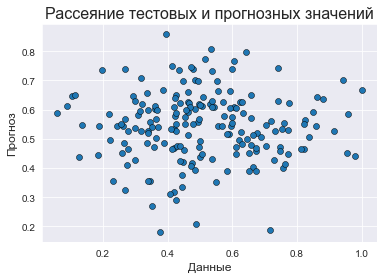

Данные   Прогноз
0    0.335617  0.657716
1    0.291854  0.645397
2    0.451900  0.548887
3    0.491968  0.557101
4    0.230523  0.355957
..        ...       ...
183  0.256788  0.552169
184  0.318633  0.525120
185  0.538286  0.431532
186  0.433821  0.734073
187  0.366300  0.598332

[188 rows x 2 columns]

In [34]:
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': Ytest_values,'Прогноз': predict_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results